In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [238]:
df=pd.read_csv('zomato.csv',encoding='latin-1')

In [239]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [240]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [242]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [243]:
df.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [244]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [245]:
df_country=pd.read_csv('Country-Code.csv')


In [246]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [247]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [248]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [249]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [250]:
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [251]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [252]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [253]:
#FROM HERE WE CAN SEE THERE ARE HOW MANY NUMBERS OF ZOMOTO IN DIFFERENT COUNTRY

In [254]:
Country_names=final_df.Country.value_counts().index
Country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [255]:
#from here you will get the to know the country name only

In [256]:
Country_values=final_df.Country.value_counts().values
Country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [257]:
#here you can see the the no of zomato used per country

In [258]:
#now lets plot the pi chart and see the data

([<matplotlib.patches.Wedge at 0x16ab2eb4e80>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

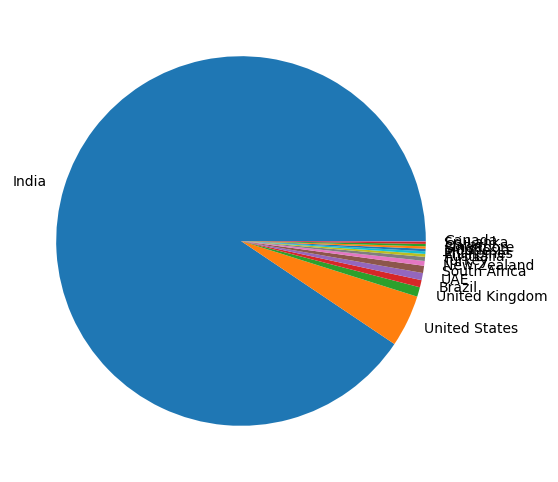

In [259]:
plt.pie(Country_values,labels=Country_names)

In [260]:
# here you can see the top 3 country with highest zomato uses

([<matplotlib.patches.Wedge at 0x16ab2f1bbe0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

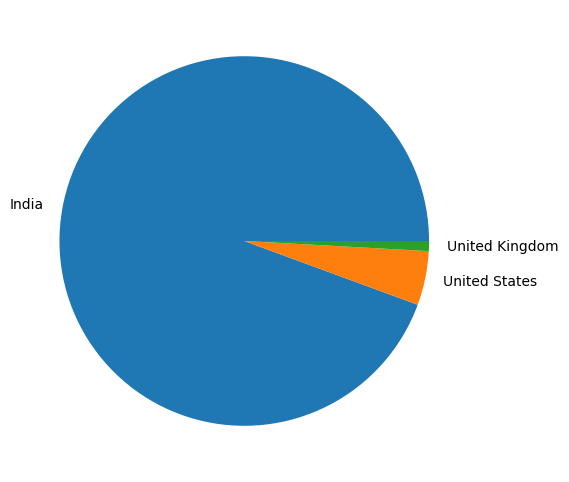

In [261]:
plt.pie(Country_values[:3],labels=Country_names[:3])

In [262]:

# by using autopct you can display % on piechart

([<matplotlib.patches.Wedge at 0x16ab2f66470>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

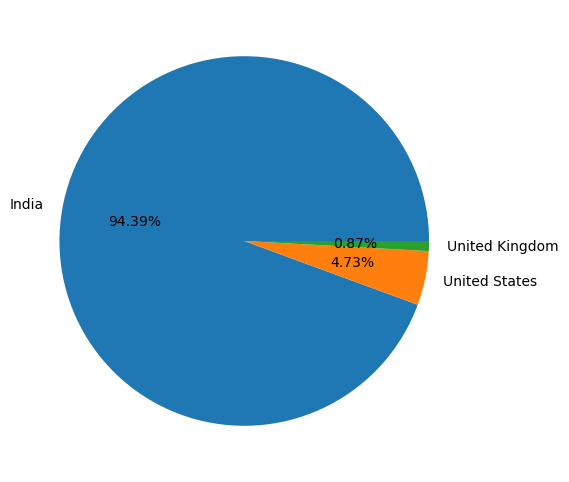

In [263]:
plt.pie(Country_values[:3],labels=Country_names[:3],autopct='%1.2f%%')

In [264]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [265]:
# so from here you can see white is not rated,red is rated poor,orange is rated as average,yeloow good ,green excelent

In [266]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [267]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [268]:
rating=final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'rating count'})
rating

,Aggregate rating,Rating color,Rating text,rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [269]:
rating.head(5)

,Aggregate rating,Rating color,Rating text,rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


In [270]:
import matplotlib

In [271]:
matplotlib.rcParams['figure.figsize']=(12,6)

<Axes: xlabel='Aggregate rating', ylabel='rating count'>

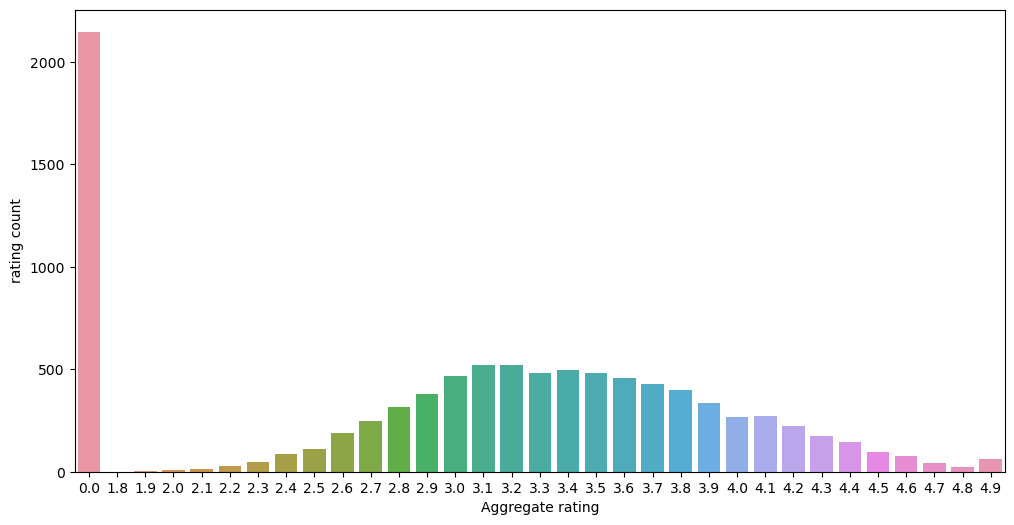

In [272]:
sns.barplot(x='Aggregate rating',y='rating count',data=rating)

<Axes: xlabel='Aggregate rating', ylabel='rating count'>

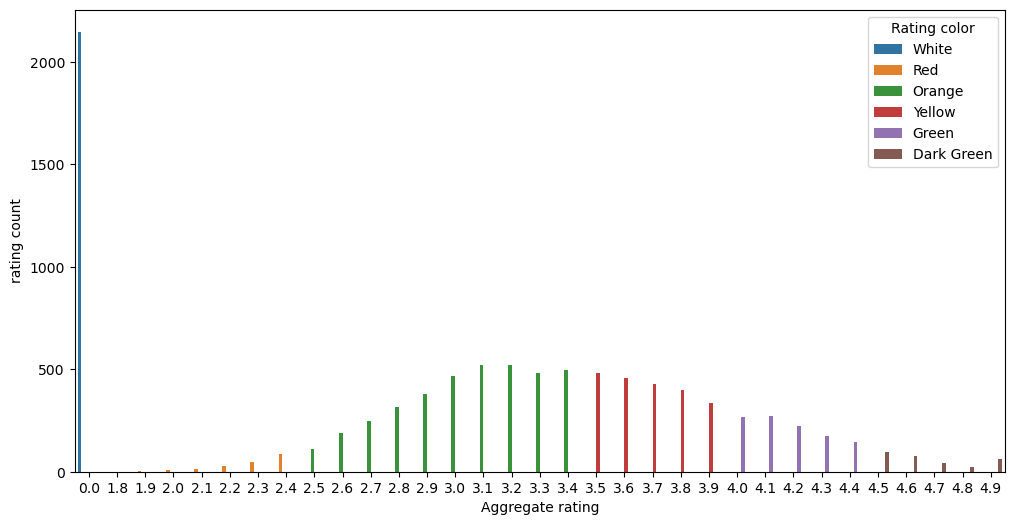

In [273]:
sns.barplot(x='Aggregate rating',y='rating count',hue='Rating color',data=rating)

<Axes: xlabel='Aggregate rating', ylabel='rating count'>

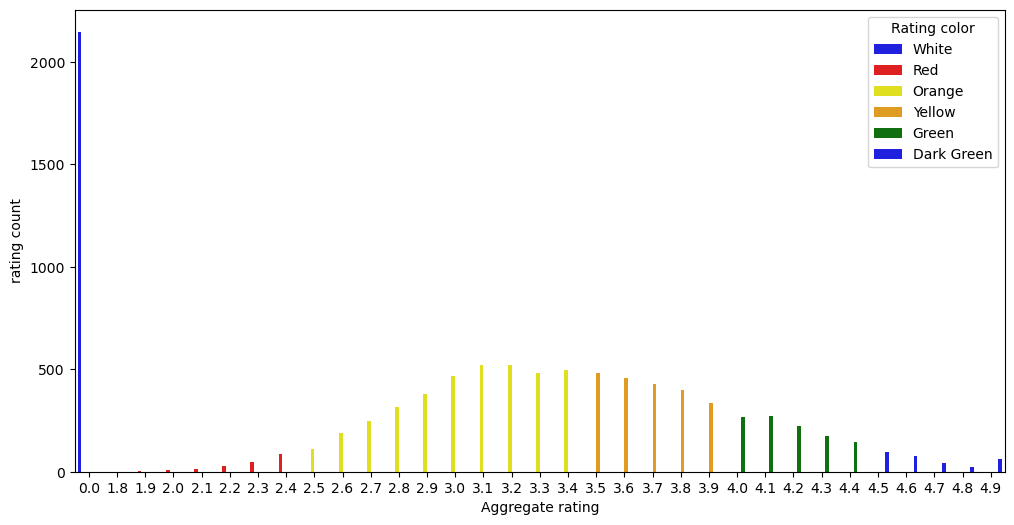

In [274]:
sns.barplot(x='Aggregate rating',y='rating count',hue='Rating color',data=rating,palette=['blue','red','yellow','orange','green','blue'])

In [275]:
#observation not rated is very high

In [276]:
#count plot

<Axes: xlabel='Rating color', ylabel='count'>

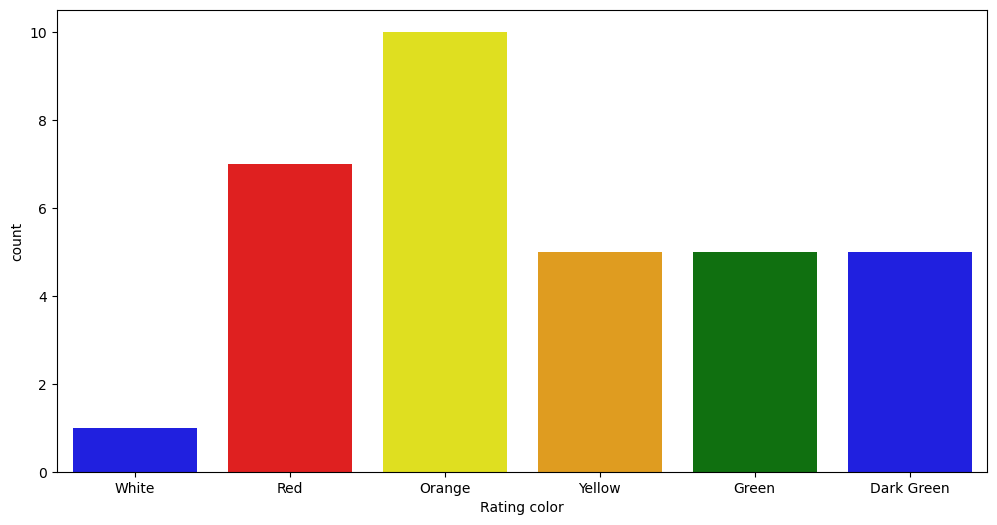

In [277]:
sns.countplot(x="Rating color",data=rating,palette=['blue','red','yellow','orange','green','blue'])

In [278]:
#find the country who has given zero rating

In [279]:
final_df[final_df['Rating color']=='Dark green'].groupby('Country').size().reset_index()

,Country,0


In [280]:
final_df['Rating color']

0       Dark Green
1       Dark Green
2            Green
3       Dark Green
4       Dark Green
           ...    
9546         Green
9547         Green
9548        Yellow
9549         Green
9550         Green
Name: Rating color, Length: 9551, dtype: object

In [281]:
#which country use what currency

In [282]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [283]:
#which country have online delivery

In [284]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [285]:
final_df[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [286]:
final_df.groupby(['Has Online delivery']).size().reset_index()

,Has Online delivery,0
0,No,7100
1,Yes,2451


In [287]:
final_df


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [288]:
final_df=final_df.drop(['Longitude','Latitude','Restaurant ID','Country Code','Address','Locality','Locality Verbose','Is delivering now','Switch to order menu','City','Currency','Restaurant Name','Country'],axis=1)

# data preprocess

In [289]:
final_df

,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,"French, Japanese, Desserts",1100,Yes,No,3,4.8,Dark Green,Excellent,314
1,Japanese,1200,Yes,No,3,4.5,Dark Green,Excellent,591
2,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,Green,Very Good,270
3,"Japanese, Sushi",1500,No,No,4,4.9,Dark Green,Excellent,365
4,"Japanese, Korean",1500,Yes,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...
9546,Turkish,80,No,No,3,4.1,Green,Very Good,788
9547,"World Cuisine, Patisserie, Cafe",105,No,No,3,4.2,Green,Very Good,1034
9548,"Italian, World Cuisine",170,No,No,4,3.7,Yellow,Good,661
9549,Restaurant Cafe,120,No,No,4,4.0,Green,Very Good,901


In [294]:
final_df.columns

Index(['Cuisines', 'Average Cost for two', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [295]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cuisines              9542 non-null   object 
 1   Average Cost for two  9551 non-null   int64  
 2   Has Table booking     9551 non-null   object 
 3   Has Online delivery   9551 non-null   object 
 4   Price range           9551 non-null   int64  
 5   Aggregate rating      9551 non-null   float64
 6   Rating color          9551 non-null   object 
 7   Rating text           9551 non-null   object 
 8   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 746.2+ KB


In [296]:
final_df.shape

(9551, 9)

In [297]:
final_df.isnull().sum()

Cuisines                9
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [298]:
final_df.dropna

<bound method DataFrame.dropna of                               Cuisines  Average Cost for two  \
0           French, Japanese, Desserts                  1100   
1                             Japanese                  1200   
2     Seafood, Asian, Filipino, Indian                  4000   
3                      Japanese, Sushi                  1500   
4                     Japanese, Korean                  1500   
...                                ...                   ...   
9546                           Turkish                    80   
9547   World Cuisine, Patisserie, Cafe                   105   
9548            Italian, World Cuisine                   170   
9549                   Restaurant Cafe                   120   
9550                              Cafe                    55   

     Has Table booking Has Online delivery  Price range  Aggregate rating  \
0                  Yes                  No            3               4.8   
1                  Yes                  No 

In [299]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cuisines              9542 non-null   object 
 1   Average Cost for two  9551 non-null   int64  
 2   Has Table booking     9551 non-null   object 
 3   Has Online delivery   9551 non-null   object 
 4   Price range           9551 non-null   int64  
 5   Aggregate rating      9551 non-null   float64
 6   Rating color          9551 non-null   object 
 7   Rating text           9551 non-null   object 
 8   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 746.2+ KB


In [300]:
final_df=final_df.drop('Cuisines',axis=1)

In [301]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Average Cost for two  9551 non-null   int64  
 1   Has Table booking     9551 non-null   object 
 2   Has Online delivery   9551 non-null   object 
 3   Price range           9551 non-null   int64  
 4   Aggregate rating      9551 non-null   float64
 5   Rating color          9551 non-null   object 
 6   Rating text           9551 non-null   object 
 7   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 671.6+ KB


In [302]:
# Step 3: Split numeric columns into X

X_num= final_df.select_dtypes(include='number')
X_num.head()

,Average Cost for two,Price range,Aggregate rating,Votes
0,1100,3,4.8,314
1,1200,3,4.5,591
2,4000,4,4.4,270
3,1500,4,4.9,365
4,1500,4,4.8,229


In [303]:
# function to remove outlier
def outlier_remover(df_num,df):
    Q1 = df_num.quantile(0.25)
    Q3 = df_num.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]
    return df

In [304]:
final_df= outlier_remover(X_num,final_df)

In [305]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [306]:
final_df.shape

(5635, 8)

<Axes: xlabel='Price range'>

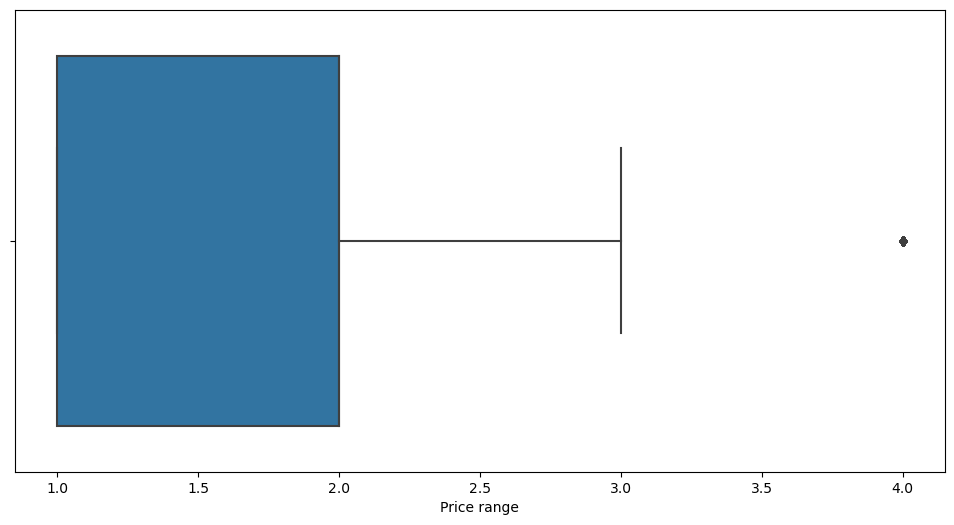

In [307]:
sns.boxplot(x=df['Price range'])

In [308]:
X_num = df.select_dtypes(include='number')
final_df = outlier_remover(X_num,final_df)

C:\Users\Anmol\AppData\Local\Temp\ipykernel_19624\3407523188.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]


<Axes: xlabel='Price range'>

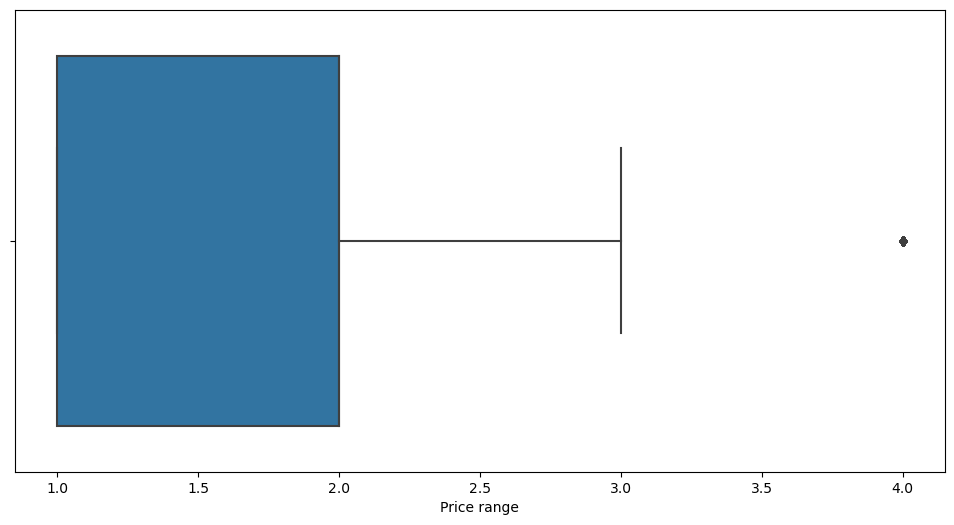

In [309]:
sns.boxplot(x=df['Price range'])

In [310]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [311]:
X_num_scaled

array([[0.34147997, 0.74883721, 0.83831822, ..., 0.66666667, 0.97959184,
        0.02871776],
       [0.34075837, 0.74883721, 0.83827786, ..., 0.66666667, 0.91836735,
        0.05405158],
       [0.34052676, 0.74883721, 0.83840626, ..., 1.        , 0.89795918,
        0.02469362],
       ...,
       [0.31976013, 0.9627907 , 0.56188113, ..., 1.        , 0.75510204,
        0.06045363],
       [0.31977662, 0.9627907 , 0.56188527, ..., 1.        , 0.81632653,
        0.08240351],
       [0.32038687, 0.9627907 , 0.56185522, ..., 0.33333333, 0.81632653,
        0.05405158]])

In [312]:
final_df.shape

(4704, 8)

In [313]:
X = final_df.drop('Votes', axis=1)
y = final_df.Votes
X.head()

,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text
865,250,No,No,1,2.9,Orange,Average
866,500,No,No,2,2.8,Orange,Average
867,150,No,No,1,2.8,Orange,Average
868,150,No,No,1,2.9,Orange,Average
869,100,No,No,1,2.8,Orange,Average


In [314]:
X_num = X.select_dtypes('number')
X_num.head()

,Average Cost for two,Price range,Aggregate rating
865,250,1,2.9
866,500,2,2.8
867,150,1,2.8
868,150,1,2.9
869,100,1,2.8


In [315]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Has Table booking,Has Online delivery,Rating color,Rating text
865,No,No,Orange,Average
866,No,No,Orange,Average
867,No,No,Orange,Average
868,No,No,Orange,Average
869,No,No,Orange,Average


In [320]:
# Step 4: Rescale numeric columns (optional, based on the algorithm used)
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [321]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [322]:
X_num_scaled.describe()

,Average Cost for two,Price range,Aggregate rating
count,4704.000000,4704.000000,4704.000000
mean,0.343026,0.279549,0.430570
std,0.195539,0.310149,0.141038
min,0.000000,0.000000,0.000000
25%,0.192308,0.000000,0.333333
50%,0.307692,0.000000,0.433333
75%,0.423077,0.500000,0.533333
max,1.000000,1.000000,1.000000


In [323]:
# Step 5: One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [324]:
# Step 6: Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [325]:
X.shape, X_num_scaled.shape, X_cat_encoded.shape

((4704, 17), (4704, 3), (4704, 14))

In [326]:
# Step 7: Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
Average Cost for two       0
Price range                0
Aggregate rating           0
Has Table booking_No       0
Has Table booking_Yes      0
Has Online delivery_No     0
Has Online delivery_Yes    0
Rating color_Dark Green    0
Rating color_Green         0
Rating color_Orange        0
Rating color_Red           0
Rating color_Yellow        0
Rating text_Average        0
Rating text_Excellent      0
Rating text_Good           0
Rating text_Poor           0
Rating text_Very Good      0
dtype: int64
0
(4704, 17)
(4704,)


In [327]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(3763, 17)
(941, 17)
(3763,)
(941,)


# KNN

In [337]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import warnings

In [343]:
def find_mape(y,y_pred):
    return np.mean(((np.abs(y-y_pred)/y)))

In [344]:
def test_holdout(k_list,X_train, X_test, y_train, y_test):
    train_mape_scores=[]
    test_mape_scores=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_train_pred = knn.predict(X_train)
        train_mape = find_mape(y_train, y_train_pred)
        train_mape_scores.append(train_mape)
        y_test_pred = knn.predict(X_test)
        test_mape = find_mape(y_test,y_test_pred)
        test_mape_scores.append(test_mape)
    best_k = k_list[np.argmin(test_mape_scores)]
    
    return best_k,train_mape_scores,test_mape_scores

In [354]:
train_mape_scores


[1.11008286124913,
 1.0249235296220038,
 1.0541623480558406,
 1.03799122765563,
 1.0365119595245882]

In [355]:
test_mape_scores

[1.6220926349430438,
 1.2547107244736104,
 1.2026466438377046,
 1.1677880150132924,
 1.1346419745438625]

In [349]:
def cross_validation(X,y):
    cv_mape_scores=[]
    best_k_CV=[]
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors = k)
        cv_scores = -cross_val_score(knn,X,y,cv=5,scoring='neg_mean_absolute_percentage_error')
        print("for k = {}, cv_scores = {}".format(k,cv_scores))
        cv_mape = np.mean(cv_scores)
        cv_mape_scores.append(cv_mape)
   
    return best_k_CV,cv_mape_scores

In [350]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,10,2)

best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)

best_k_CV,cv_mape_scores= cross_validation(X,y)

for k = 1, cv_scores = [1.49257685 1.26010441 1.17637596 1.23701315 1.49124921]
for k = 3, cv_scores = [1.36579869 1.03144093 0.99830463 1.0800567  1.36535179]
for k = 5, cv_scores = [1.36279202 1.04980387 1.01827714 1.0880681  1.38198002]
for k = 7, cv_scores = [1.3103212  1.02004153 1.0354452  1.10848928 1.40876094]
for k = 9, cv_scores = [1.27777529 1.0189516  1.05235243 1.09828526 1.42869762]


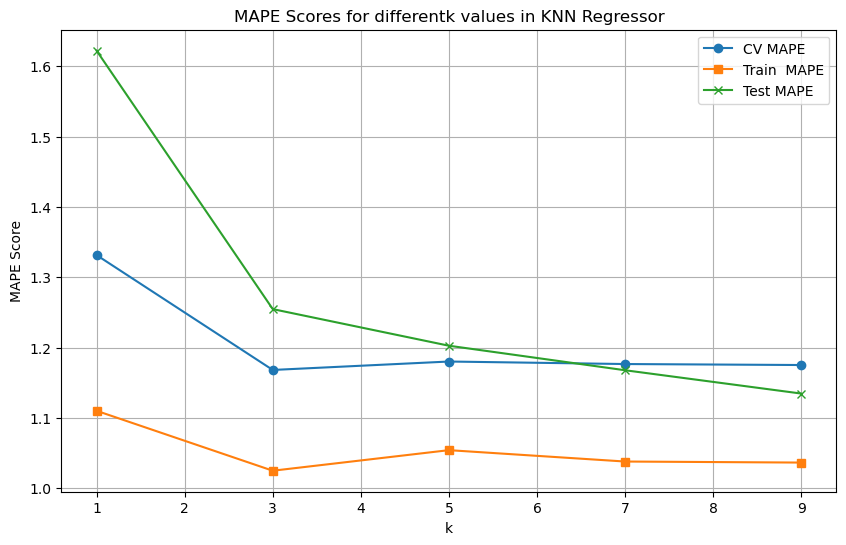

9
The best K value for CV is 3.


In [351]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()

# Compare the best K value for CV
best_k_CV = k_list[np.argmin(cv_mape_scores)]
best_k = k_list[test_mape_scores.index(min(test_mape_scores))]
print(best_k)
print(f"The best K value for CV is {best_k_CV}.")

In [362]:
#validate_hold_out(X_train,X_test,y_train,y_test)
k_list=np.arange(1,15,2)

best_k,train_mape_scores,test_mape_scores = test_holdout(k_list,X_train,X_test,y_train,y_test)

best_k_CV,cv_mape_scores= cross_validation(X,y)

for k = 1, cv_scores = [1.49257685 1.26010441 1.17637596 1.23701315 1.49124921]
for k = 3, cv_scores = [1.36579869 1.03144093 0.99830463 1.0800567  1.36535179]
for k = 5, cv_scores = [1.36279202 1.04980387 1.01827714 1.0880681  1.38198002]
for k = 7, cv_scores = [1.3103212  1.02004153 1.0354452  1.10848928 1.40876094]
for k = 9, cv_scores = [1.27777529 1.0189516  1.05235243 1.09828526 1.42869762]
for k = 11, cv_scores = [1.25722204 0.99611552 1.01947144 1.09403624 1.38192427]
for k = 13, cv_scores = [1.25171501 0.98816075 1.00868803 1.08549045 1.3845682 ]


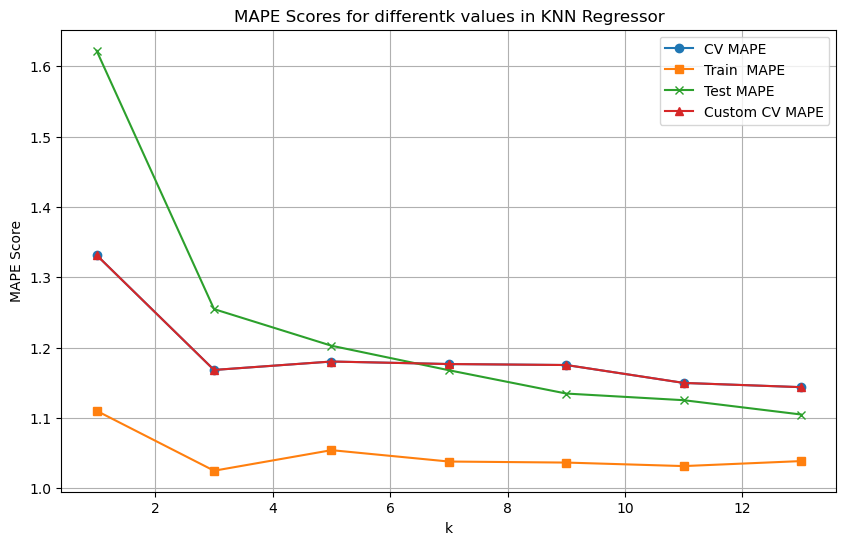

13
The best K value for CV is 13.


In [363]:
#plot CV MAPE, Train MAPE, Test MAPE for different values of K
plt.figure(figsize=(10,6))
plt.plot(k_list,cv_mape_scores,label='CV MAPE', marker='o')
plt.plot(k_list,train_mape_scores,label='Train  MAPE', marker='s')
plt.plot(k_list,test_mape_scores,label='Test MAPE', marker='x')
plt.plot(k_list,cv_mape_scores,label='Custom CV MAPE', marker='^')
plt.xlabel('k')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for differentk values in KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()

# Compare the best K value for CV
best_k_CV = k_list[np.argmin(cv_mape_scores)]
best_k = k_list[test_mape_scores.index(min(test_mape_scores))]
print(best_k)
print(f"The best K value for CV is {best_k_CV}.")